https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Отобразим распределение признаков с учетом 2-ух видов рака

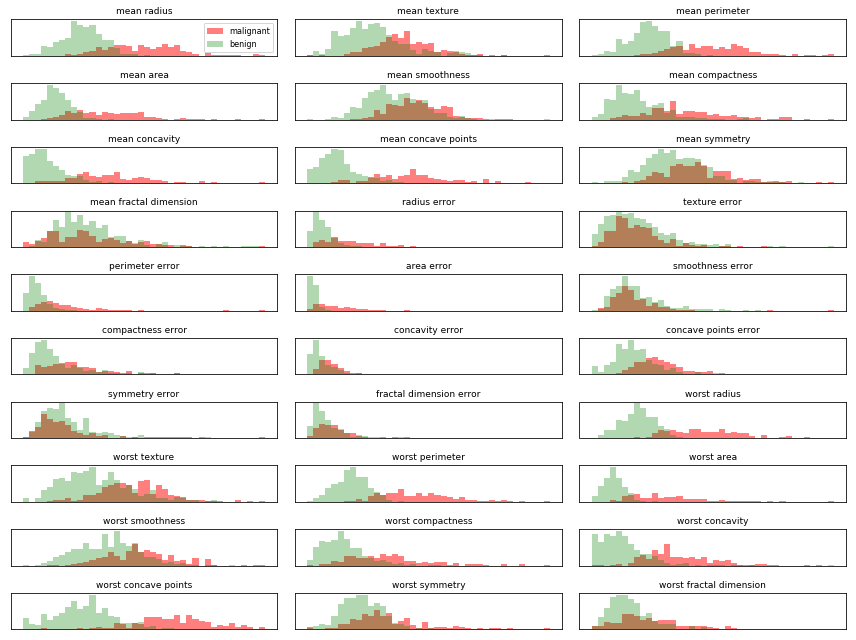

In [2]:
cancer = load_breast_cancer()
fig,axes =plt.subplots(10,3, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
malignant=cancer.data[cancer.target==0] # define malignant
benign=cancer.data[cancer.target==1] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=40)
    ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
    ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
    ax[i].set_title(cancer.feature_names[i],fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
    ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

Видно, что некоторые признаки разделимее остальных

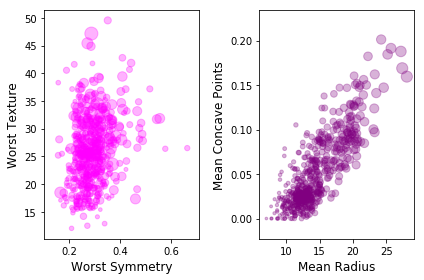

In [3]:
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)# just convert the scikit learn data-set to pandas data-frame.
plt.subplot(1,2,1)#fisrt plot
plt.scatter(cancer_df['worst symmetry'], cancer_df['worst texture'], s=cancer_df['worst area']*0.05, color='magenta', label='check', alpha=0.3)
plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(cancer_df['mean radius'], cancer_df['mean concave points'], s=cancer_df['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

Масштабируем  признаки:

In [4]:
scaler=StandardScaler()#instantiate
scaler.fit(cancer.data) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(cancer.data)# fit and transform can be applied together and I leave that for simple exercise
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print "After scaling minimum: \n", X_scaled.min(axis=0) 



After scaling minimum: 
[-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]


PCA на 3 компонента

In [5]:
pca=PCA(n_components=3)#very similar to instantiate K nearest neighbor classifier. 
pca.fit(X_scaled) # find the principal components 
X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
print "shape of X_pca", X_pca.shape
print 'Процент объясненной дисперсии:', pca.explained_variance_ratio_

shape of X_pca (569L, 3L)
Процент объясненной дисперсии: [0.44272026 0.18971182 0.09393163]


PCA на 95% объясненной дисперсии

In [6]:
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d =  np.argmax(cumsum>=0.95) +1
print d

10


И теперь можно перерасчитать с 10-ю компонентами. Или:

In [7]:
pca=PCA(n_components=0.95)#very similar to instantiate K nearest neighbor classifier. 
pca.fit(X_scaled) # find the principal components 
X_pca=pca.transform(X_scaled) 
print 'Процент объясненной дисперсии:', np.sum(pca.explained_variance_ratio_)
print 'Число компонент:', pca.n_components_

Процент объясненной дисперсии: 0.9515688143366665
Число компонент: 10


In [8]:
X_pca

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])